<span style='font-family:"Times New Roman"'><font size="3">ML-zoomcamp Data talks cours 2 : </font></span>
<br />
<br />
<br />
<br />
<span style='font-family:"Times New Roman"'><div align="center"><font size="6">**Linear regression**</font></div></span>
<br /><br />
<span style='font-family:"Times New Roman"'><font size="5"><div align="right">*18-25 sept 2023*</div></font></span>
<br />
[cours](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/notebook.ipynb)<br />
[ennoncé du devoir](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md)</font></span></div>
<br />
_____
<span style='color:blue'></span>
<br />
<br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 même dataset que semaine1

In [2]:
df = pd.read_csv('housing.csv')
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


# Préparer le df de travail <br/><span style='font-family:"Times New Roman"'><font size="4">on ne concerve qu'une partie du df initial<br /></font></span><br />

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
# variable cible
df.median_house_value #cette variable pourra faire l'objet d'une transformation par log par exemple
                      #pour la ramener à une échelle plus proche de celle des autres variables

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [5]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
dfw = df.query("ocean_proximity == ('INLAND', '<1H OCEAN')")
dfw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
dfw = dfw[['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households',
    'median_income','median_house_value']]

<Axes: xlabel='median_house_value', ylabel='Count'>

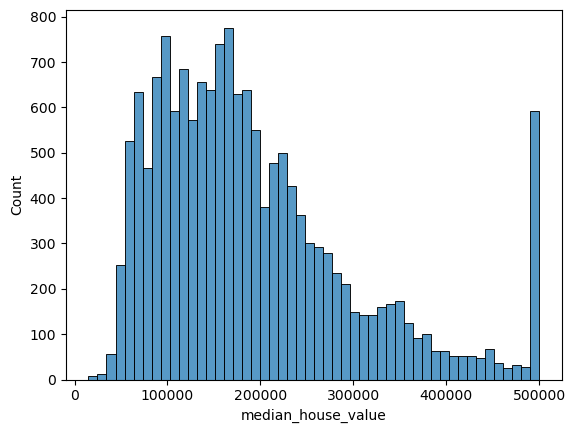

In [8]:
sns.histplot(dfw.median_house_value, bins=50)

# Exploration

In [9]:
for col in dfw.columns:
    print(col)
    print(dfw[col].unique()[:5])
    print(dfw[col].nunique())
    print()

longitude
[-121.97 -121.99 -121.96 -121.98 -122.  ]
818

latitude
[37.64 37.61 37.57 37.58 37.49]
834

housing_median_age
[32.  9. 21. 15. 20.]
52

total_rooms
[1283. 3666. 4342. 3575. 4126.]
5428

total_bedrooms
[ 194.  711.  783.  597. 1031.]
1822

population
[ 485. 2341. 2172. 1777. 2079.]
3683

households
[171. 703. 789. 559. 975.]
1707

median_income
[6.0574 4.6458 4.6146 5.7192 3.6832]
10434

median_house_value
[431000. 217000. 247600. 283500. 216900.]
3493



In [10]:
dfw.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [11]:
dfw.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

# préparation du dataset pour l'entraînement d'un modèle prédictif de valeurs immobilières

In [12]:
# estimer le nb de'individus à mettre par set

n = len(dfw)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# on va donc devoir mélanger les indiv avant de partitionner
idx = np.arange(n)
idx
# on nous impose ici une base seed = 42
np.random.seed(42)
np.random.shuffle(idx)

# partionnement
df_train = dfw.iloc[:n_train]
df_val = dfw.iloc[n_train:n_train+n_val]
df_test = dfw.iloc[n_train+n_val:]

# pour chaque sous df on réinitialise les index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
#variable cible : median value
# on récupère les sous df pour la variable cible (msrp) qu'on transforme pour travailler en log des prix+1
# on a vu qu'ainsi on considère que sa distribution suit une loi normale
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

#  et on supprime la colonne d'origine des df de train/val/test
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# entraînement avec remplacement des nan par 0

In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

# puis éxécuter la définition des pondérations w
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [15]:
def prepare_X0(df):
    df = df.copy()  
    df.total_bedrooms = df.total_bedrooms.fillna(0)
    X = df.values
    return X

In [16]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [17]:
X_train = prepare_X0(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X0(df_val)
y_pred = w0 + X_val.dot(w)
rmse_0 = rmse(y_val, y_pred)
rmse_0 = round(rmse_0, 2)
rmse_0

0.35

In [18]:
df_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458


# entraînement avec remplacement des nan par la moyenne

In [19]:
def prepare_Xm(df):
    df = df.copy() 
    df.total_bedrooms = df.total_bedrooms.fillna(df_train.total_bedrooms.mean())
    X = df.values
    return X

In [20]:
X_train = prepare_Xm(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_Xm(df_val)
y_pred = w0 + X_val.dot(w)
rmse_m = rmse(y_val, y_pred)
rmse_m =round( rmse_m, 2)
rmse_m

0.36

<span style='font-family:"Times New Roman"'><font size="4">le remplacement de valeurs manquantes par 0 donne le meilleur résultat rsme dans ce cas<br /></font></span>

## Q4 regularization 

In [21]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [22]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 -6.0445131343197875 0.3541521929448273
1e-06 -6.044492052874693 0.3541522297097735
0.0001 -6.042405725303475 0.354155874185268
0.001 -6.023504924003499 0.3541889235123104
0.01 -5.840799621843583 0.35451143726891515
0.1 -4.481271200382945 0.3570829611155623
1 -1.344832665482697 0.3641340990419998
5 -0.32474859888954355 0.36671326113540637
10 -0.16523437458892626 0.36708194148276974


<span style='font-family:"Times New Roman"'><font size="4">je peux retenir r= 0.0001 ou r = 0.000001 qui minimisent le score sans trop s'éloigner du w0 sans correction qui ic donnr un résultat cohérent. Cependant j'ajoute un r pour évitre tout risque à l'avanie sur l'utilisation du modèle. Comme l'ennoncé indique de privilégier pour ce devoir le plus petit j'appliquerai par la suite r = 0.000006<br /></font></span>

In [23]:
# r = 0.000001

## Q5 impact du choix de seed

In [24]:
dfw['median_house_value_trans'] = np.log1p(dfw.median_house_value)

In [25]:
dfw = dfw.drop(columns = 'median_house_value')

In [26]:
dfw.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value_trans'],
      dtype='object')

In [27]:
n = len(dfw)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# on va donc devoir mélanger les indiv avant de partitionner
idx = np.arange(n)

In [28]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

# puis éxécuter la définition des pondérations w
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [29]:
liste = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = dfw.iloc[idx[:n_train]]
    df_val = dfw.iloc[idx[n_train:n_train+n_val]]
    df_test = dfw.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
#variable cible : median value
# on récupère les sous df pour la variable cible

    y_train = (df_train.median_house_value_trans.values)
    y_val = (df_val.median_house_value_trans.values)
    y_test = (df_test.median_house_value_trans.values)

#  et on supprime la colonne d'origine des df de train/val/test
    del df_train['median_house_value_trans']
    del df_val['median_house_value_trans']
    del df_test['median_house_value_trans']
        
        
    X_train = prepare_X0(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    liste.append(score)
    
    print(s, score)
    

0 0.3377387160067942
1 0.3454820450563977
2 0.3322033125381122
3 0.33118280913356374
4 0.33480237565155974
5 0.3334130184720213
6 0.3325233483442222
7 0.3395291337381445
8 0.3308079495284524
9 0.34831713447467477


In [30]:
np.std(liste)

0.005816274776395153

In [31]:
round(np.std(liste), 3)

0.006

## Q6 travail avec une seed s = 9

In [32]:
dfw.median_house_value_trans

701      12.973866
830      12.287657
859      12.419574
860      12.554971
861      12.287196
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value_trans, Length: 15687, dtype: float64

In [33]:
n = len(dfw)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# on va donc devoir mélanger les indiv avant de partitionner
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

# partionnement
df_train = dfw.iloc[:n_train]
df_val = dfw.iloc[n_train:n_train+n_val]
df_test = dfw.iloc[n_train+n_val:]

# pour chaque sous df on réinitialise les index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.median_house_value_trans.values)
y_val = (df_val.median_house_value_trans.values)
y_test = (df_test.median_house_value_trans.values)

del df_train['median_house_value_trans']
del df_val['median_house_value_trans']
del df_test['median_house_value_trans']

In [34]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X0(df_full_train)

In [35]:
y_full_train = np.concatenate([y_train, y_val])

In [36]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [37]:
w0, w = train_linear_regression(X_full_train, y_full_train)

In [38]:
r = 0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r)

In [39]:
X_test = prepare_X0(df_test)
y_pred = w0 + X_test.dot(w)
rmse = rmse(y_test, y_pred)
#rmse = round(rmse_0, 2)
rmse

0.30707305298675414